In [24]:
import pandas as pd

# Load the uploaded CSV file
file_path = './1.1M.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,PRIVATE DOMESTIC - AVERAGE RENTS BY CLASS [MONTHLY],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Month,Class A Hong Kong,Class A Hong Kong - Remarks,Class A Kowloon,Class A Kowloon - Remarks,Class A New Territories,Class A New Territories - Remarks,Class B Hong Kong,Class B Hong Kong - Remarks,Class B Kowloon,...,Class D Kowloon,Class D Kowloon - Remarks,Class D New Territories,Class D New Territories - Remarks,Class E Hong Kong,Class E Hong Kong - Remarks,Class E Kowloon,Class E Kowloon - Remarks,Class E New Territories,Class E New Territories - Remarks
1,01-1999,190,NaN,171,NaN,133,NaN,199,NaN,165,...,198,NaN,185,NaN,301,NaN,185,NaN,191,NaN
2,02-1999,196,NaN,173,NaN,133,NaN,204,NaN,165,...,196,Z,173,NaN,311,NaN,213,Z,152,NaN
3,03-1999,199,NaN,170,NaN,133,NaN,197,NaN,160,...,174,NaN,186,NaN,301,NaN,194,Z,190,Z
4,04-1999,191,NaN,171,NaN,135,NaN,200,NaN,156,...,172,NaN,170,NaN,313,NaN,221,Z,172,NaN


In [ ]:
# Dropping unnecessary rows and columns, and renaming columns for clarity
# Removing rows with headers, remarks, and empty values
cleaned_data = data.iloc[1:, :].dropna(how='all', axis=1)

# Renaming relevant columns based on the pattern observed
cleaned_data.columns = [
    "Month", "Class_A_Hong_Kong", "Remarks_A_HK", "Class_A_Kowloon",
    "Remarks_A_Kowloon", "Class_A_New_Territories", "Remarks_A_NT",
    "Class_B_Hong_Kong", "Remarks_B_HK", "Class_B_Kowloon", "Remarks_B_Kowloon",
    "Class_B_New_Territories", "Remarks_B_NT", "Class_C_Hong_Kong",
    "Remarks_C_HK", "Class_C_Kowloon", "Remarks_C_Kowloon", "Class_C_New_Territories",
    "Remarks_C_NT", "Class_D_Hong_Kong", "Remarks_D_HK", "Class_D_Kowloon",
    "Remarks_D_Kowloon", "Class_D_New_Territories", "Remarks_D_NT", "Class_E_Hong_Kong",
    "Remarks_E_HK", "Class_E_Kowloon", "Remarks_E_Kowloon", "Class_E_New_Territories",
    "Remarks_E_NT"
]

# Dropping columns with remarks as they do not provide numeric data for analysis
columns_to_drop = [col for col in cleaned_data.columns if "Remarks" in col]
cleaned_data = cleaned_data.drop(columns=columns_to_drop)

# Converting relevant columns to numeric, replacing invalid values with NaN
for col in cleaned_data.columns[1:]:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')

cleaned_data.head()

,Month,Class_A_Hong_Kong,Class_A_Kowloon,Class_A_New_Territories,Class_B_Hong_Kong,Class_B_Kowloon,Class_B_New_Territories,Class_C_Hong_Kong,Class_C_Kowloon,Class_C_New_Territories,Class_D_Hong_Kong,Class_D_Kowloon,Class_D_New_Territories,Class_E_Hong_Kong,Class_E_Kowloon,Class_E_New_Territories
1,01-1999,190,171,133,199,165,118,249,187,150,284,198,185,301,185.0,191.0
2,02-1999,196,173,133,204,165,114,239,177,144,268,196,173,311,213.0,152.0
3,03-1999,199,170,133,197,160,117,247,177,142,262,174,186,301,194.0,190.0
4,04-1999,191,171,135,200,156,116,256,182,134,279,172,170,313,221.0,172.0
5,05-1999,191,175,127,188,155,113,233,175,133,279,180,180,289,168.0,162.0


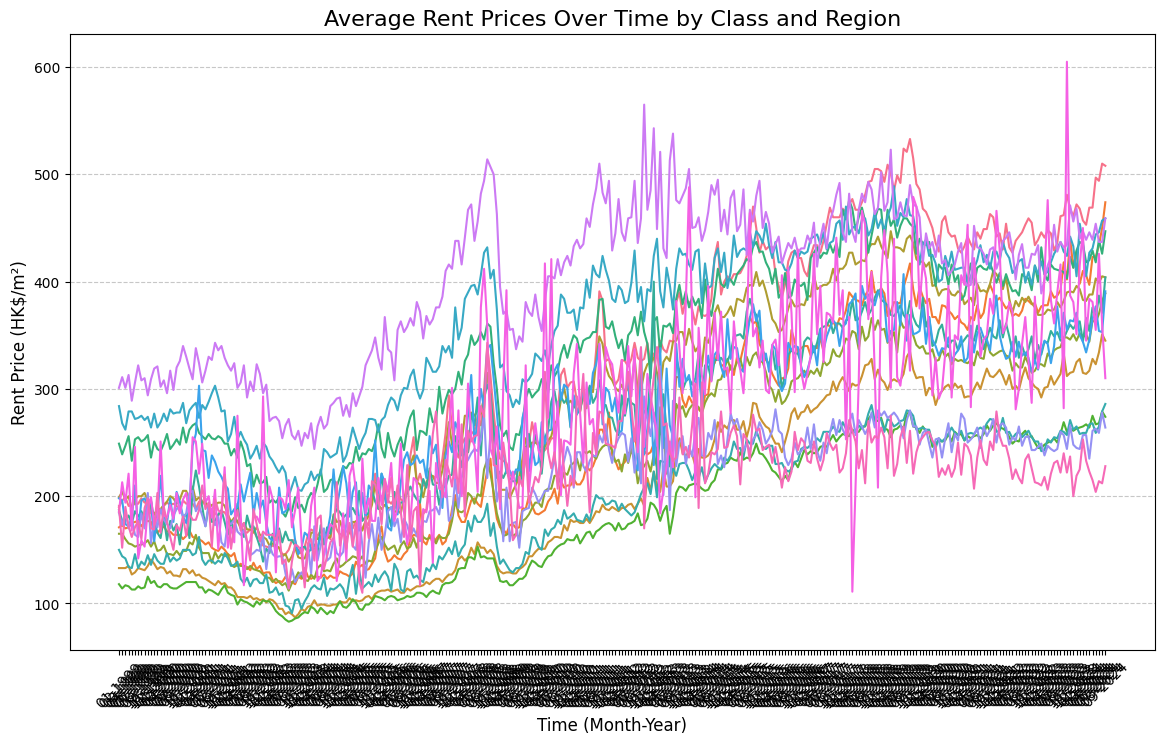

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape the dataset for better visualization (Melt it for "tidy" format)
melted_data = cleaned_data.melt(id_vars=["Month"], 
                                var_name="Category_Region", 
                                value_name="Rent_Price")

# Add new columns to separate Class and Region from the Category_Region column
melted_data[['Class', 'Region']] = melted_data['Category_Region'].str.extract(r'(Class_[A-E])_(.*)')

# Drop rows with missing rent prices for better visualization
melted_data = melted_data.dropna(subset=["Rent_Price"])

# Plotting average rent prices over time for each class and region
plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_data, x="Month", y="Rent_Price", hue="Category_Region", legend=None)
plt.title("Average Rent Prices Over Time by Class and Region", fontsize=16)
plt.xlabel("Time (Month-Year)", fontsize=12)
plt.ylabel("Rent Price (HK$/m²)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Preparing data for regression
# Extract relevant columns for input (Class and Region) and target (Rent_Price)
melted_data = melted_data.dropna(subset=["Class", "Region", "Rent_Price"])
X = melted_data[["Class", "Region"]]
y = melted_data["Rent_Price"]

# Encode Class and Region as one-hot categorical variables
encoder = OneHotEncoder(sparse_output=False, drop="first")
X_encoded = encoder.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a multivariate linear regression model
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
    
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output regression evaluation metrics
mse, r2


(6768.095174819402, 0.34368617989972794)

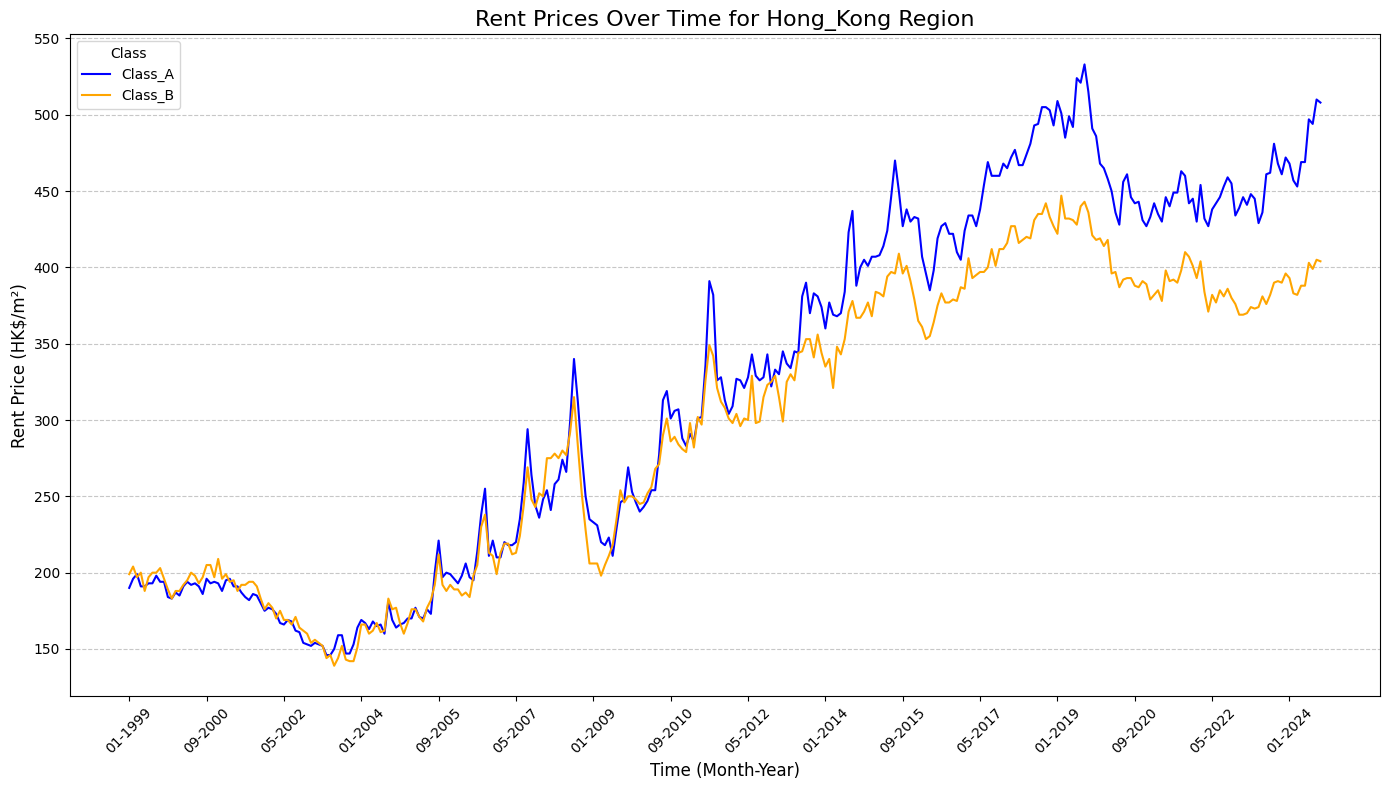

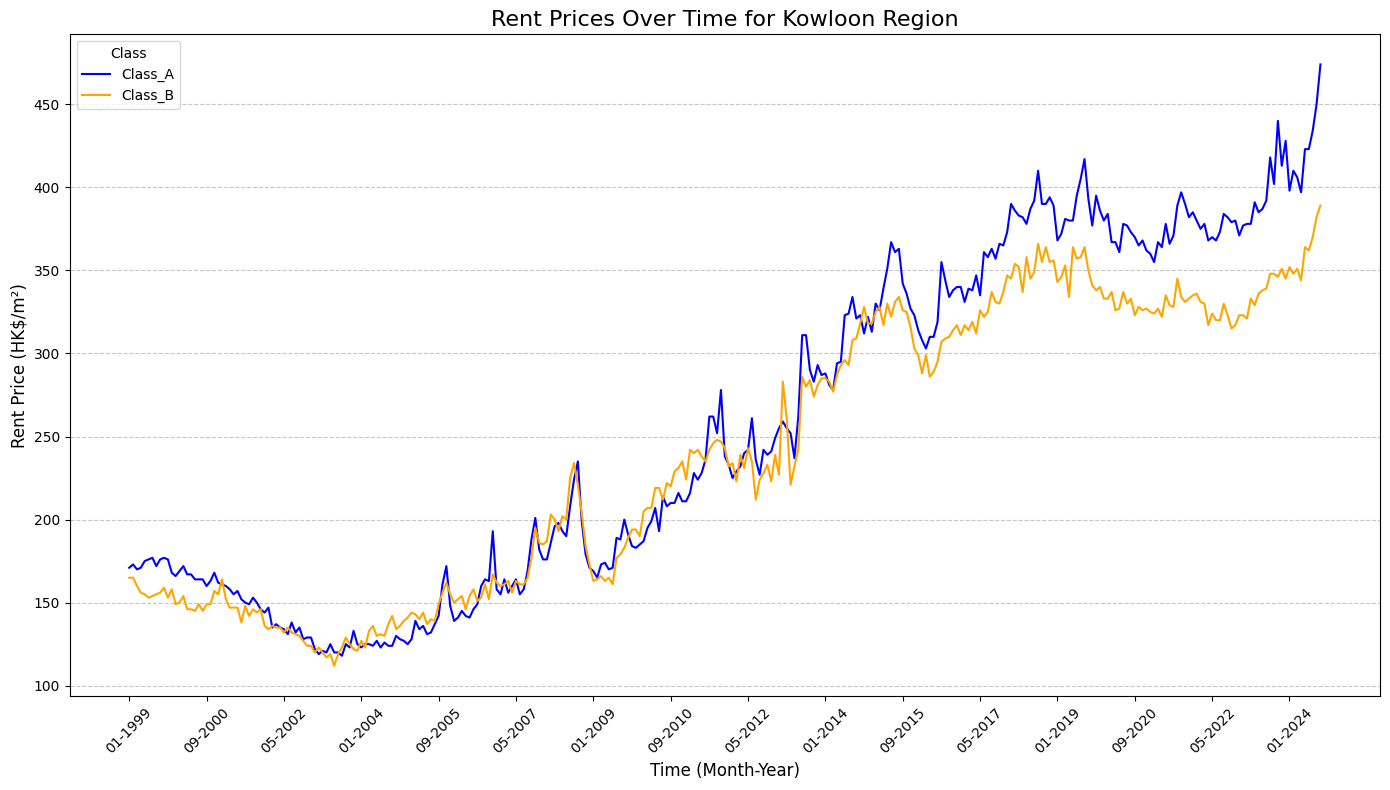

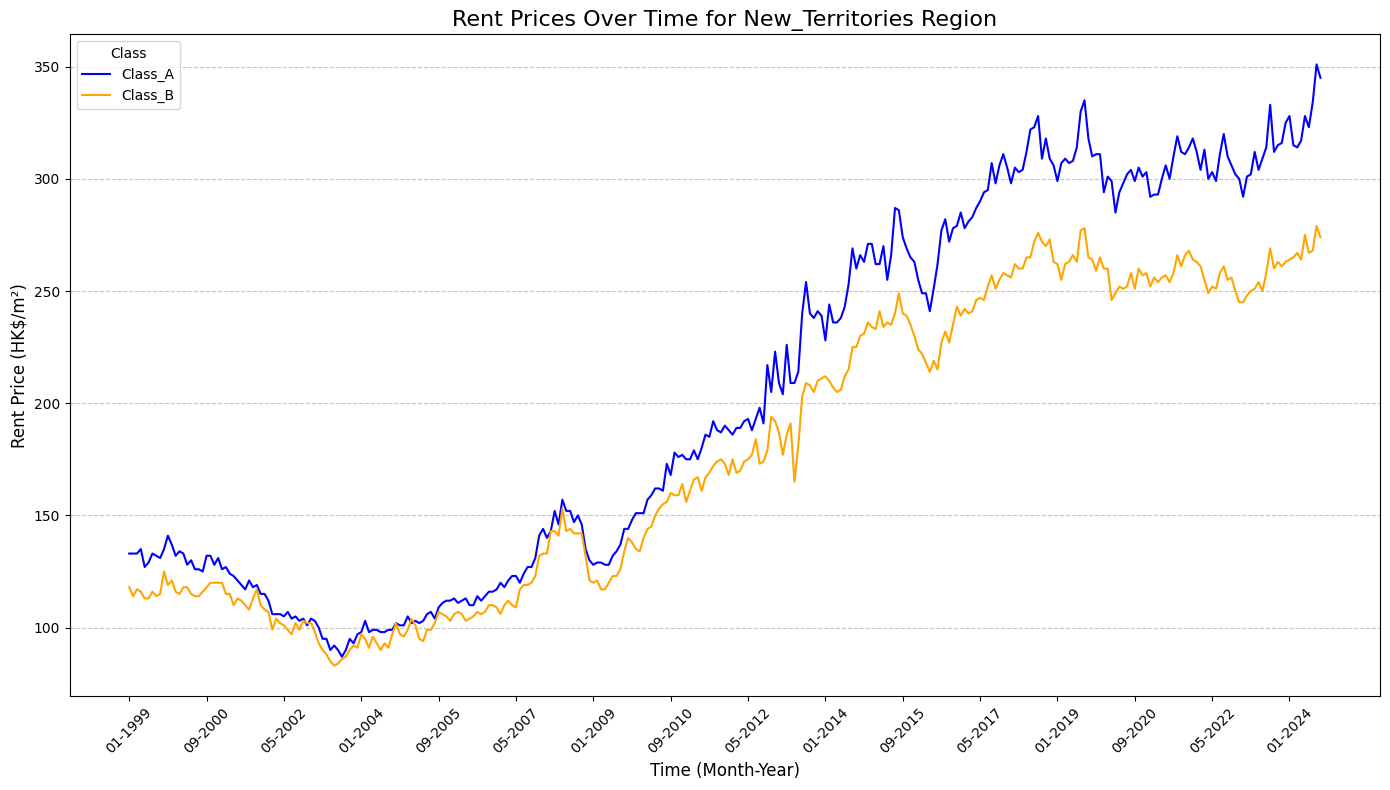

C:\Users\user\AppData\Local\Temp\ipykernel_37004\3827067825.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rent_by_class.index, y=avg_rent_by_class.values, palette="viridis")


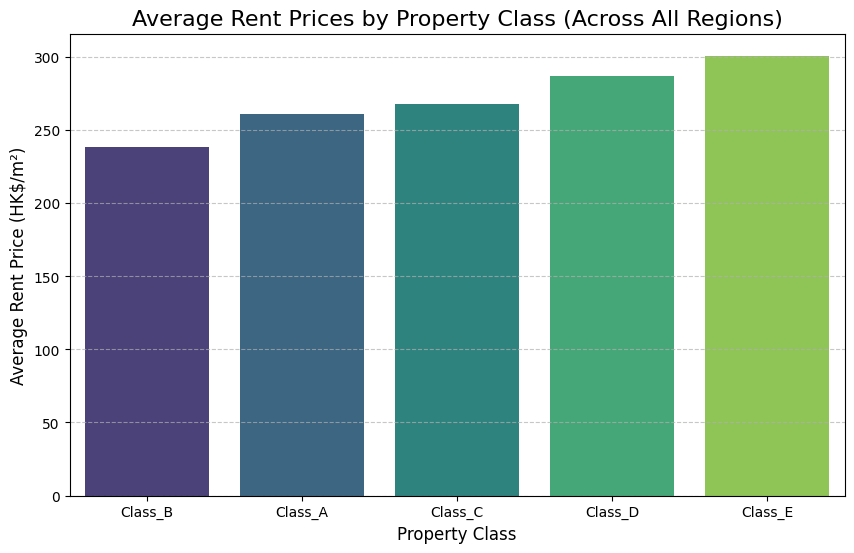

C:\Users\user\AppData\Local\Temp\ipykernel_37004\3827067825.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_data, x="Class", y="Rent_Price", palette="coolwarm")


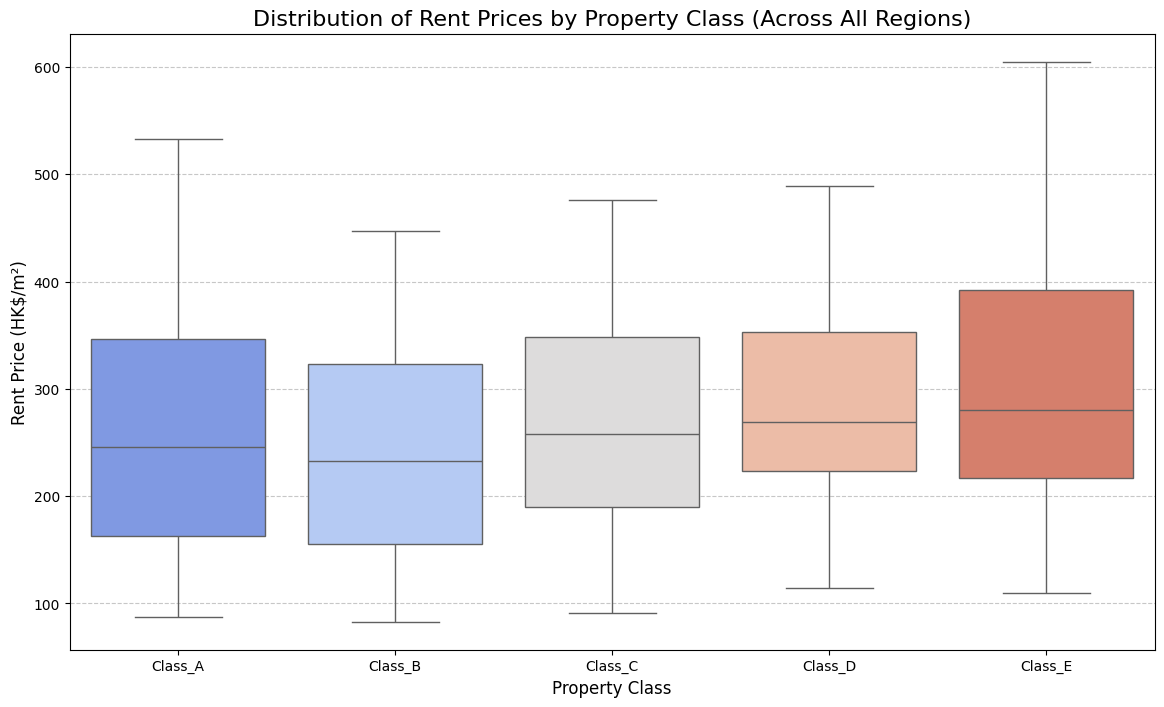

In [32]:
def plot_rent_by_region_fixed_xaxis(data, region, title_suffix):
    plt.figure(figsize=(14, 8))
    colors = ['blue', 'orange']  # High-contrast colors
    for cls, color in zip(['Class_A', 'Class_B'], colors):
        subset = data[(data['Region'] == region) & (data['Class'] == cls)]
        plt.plot(subset['Month'], subset['Rent_Price'], label=cls, color=color)
    
    plt.title(f"Rent Prices Over Time for {region} {title_suffix}", fontsize=16)
    plt.xlabel("Time (Month-Year)", fontsize=12)
    plt.ylabel("Rent Price (HK$/m²)", fontsize=12)
    
    # Dynamically adjust x-axis ticks based on the number of data points
    total_points = len(data['Month'].unique())
    tick_spacing = max(1, total_points // 15)  # Show around 15 ticks
    plt.xticks(ticks=range(0, total_points, tick_spacing), rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title="Class", fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Hong Kong Island Rent Prices with dynamically fixed x-axis
plot_rent_by_region_fixed_xaxis(melted_data, "Hong_Kong", "Region")

# Kowloon Rent Prices with dynamically fixed x-axis
plot_rent_by_region_fixed_xaxis(melted_data, "Kowloon", "Region")

# New Territories Rent Prices with dynamically fixed x-axis
plot_rent_by_region_fixed_xaxis(melted_data, "New_Territories", "Region")



# Visualizing Average Rent Prices by Class Across All Regions
avg_rent_by_class = melted_data.groupby(['Class'])['Rent_Price'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rent_by_class.index, y=avg_rent_by_class.values, palette="viridis")
plt.title("Average Rent Prices by Property Class (Across All Regions)", fontsize=16)
plt.xlabel("Property Class", fontsize=12)
plt.ylabel("Average Rent Price (HK$/m²)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualizing Distribution of Rent Prices for Each Class Across All Regions
plt.figure(figsize=(14, 8))
sns.boxplot(data=melted_data, x="Class", y="Rent_Price", palette="coolwarm")
plt.title("Distribution of Rent Prices by Property Class (Across All Regions)", fontsize=16)
plt.xlabel("Property Class", fontsize=12)
plt.ylabel("Rent Price (HK$/m²)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Linear Regression for Class_A in Hong_Kong:
  Coefficient: 1.2662825743001125
  Intercept: 127.35817935066297
  Mean Squared Error: 1589.48
  R2 Score: 0.89



C:\Users\user\AppData\Local\Temp\ipykernel_37004\29748994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Month_Numeric'] = np.arange(len(subset))


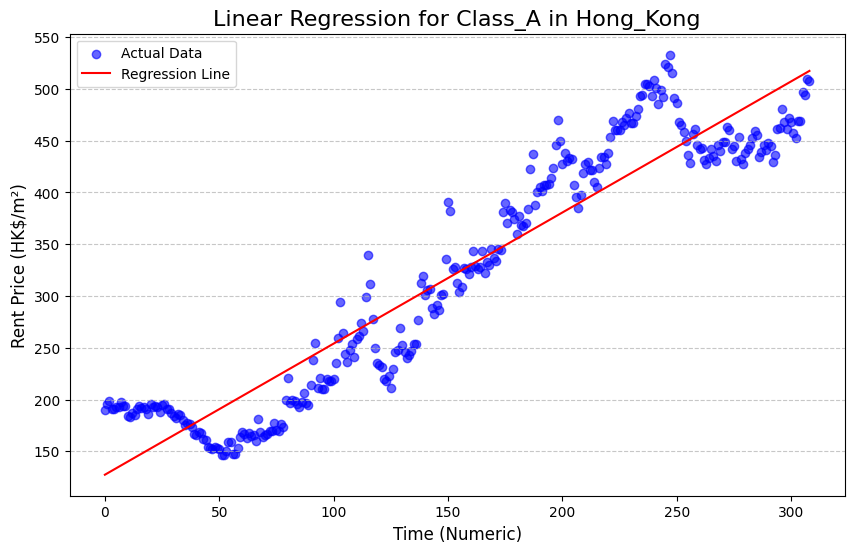

C:\Users\user\AppData\Local\Temp\ipykernel_37004\29748994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Month_Numeric'] = np.arange(len(subset))


Linear Regression for Class_A in Kowloon:
  Coefficient: 1.076734821708201
  Intercept: 90.90128405887882
  Mean Squared Error: 1143.16
  R2 Score: 0.89



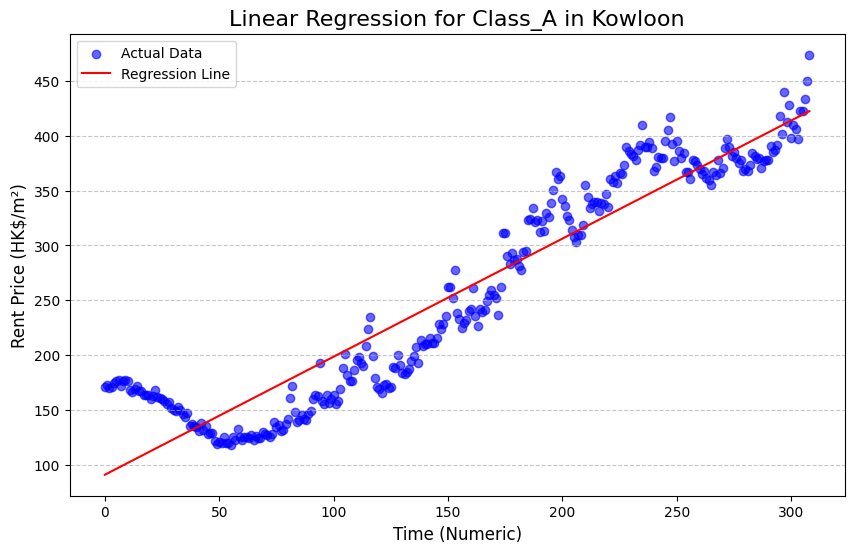

C:\Users\user\AppData\Local\Temp\ipykernel_37004\29748994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Month_Numeric'] = np.arange(len(subset))


Linear Regression for Class_A in New_Territories:
  Coefficient: 0.8864150882002433
  Intercept: 67.550328844347
  Mean Squared Error: 790.82
  R2 Score: 0.89



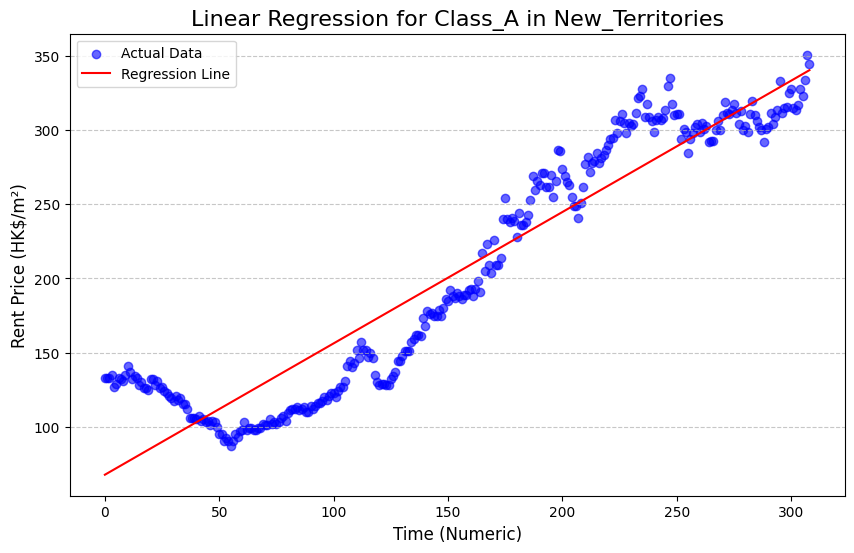

C:\Users\user\AppData\Local\Temp\ipykernel_37004\29748994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Month_Numeric'] = np.arange(len(subset))


Linear Regression for Class_B in Hong_Kong:
  Coefficient: 0.9764846803681757
  Intercept: 146.1100323624595
  Mean Squared Error: 1329.26
  R2 Score: 0.85



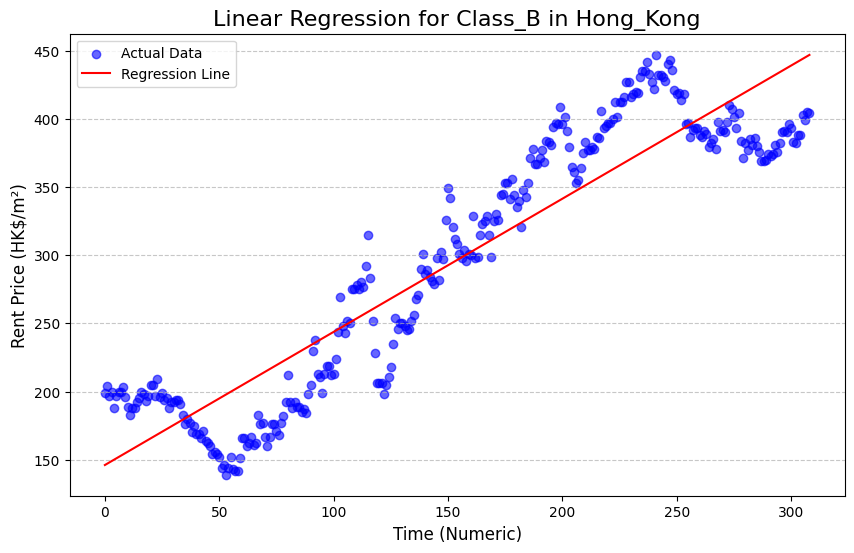

C:\Users\user\AppData\Local\Temp\ipykernel_37004\29748994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Month_Numeric'] = np.arange(len(subset))


Linear Regression for Class_B in Kowloon:
  Coefficient: 0.8906117684382638
  Intercept: 102.95258377701222
  Mean Squared Error: 773.22
  R2 Score: 0.89



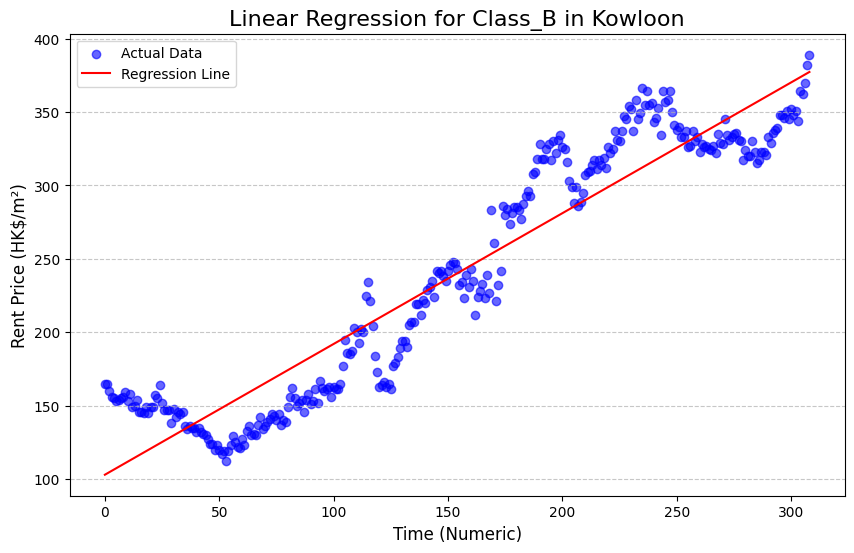

C:\Users\user\AppData\Local\Temp\ipykernel_37004\29748994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Month_Numeric'] = np.arange(len(subset))


Linear Regression for Class_B in New_Territories:
  Coefficient: 0.696886452100984
  Intercept: 71.41411420816368
  Mean Squared Error: 483.71
  R2 Score: 0.89



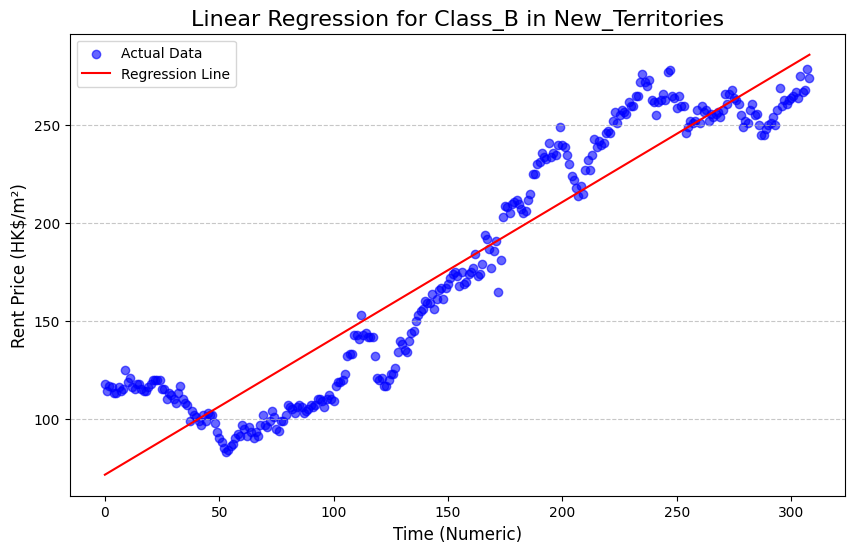

In [36]:
import numpy as np

# Function to perform linear regression for a specific class and region
def linear_regression_by_class_region(data, cls, region):
    # Filter the data for the given class and region
    subset = data[(data['Class'] == cls) & (data['Region'] == region)]
    
    # Convert Month to numeric for regression
    subset['Month_Numeric'] = np.arange(len(subset))
    
    # Prepare features (X) and target (y)
    X = subset['Month_Numeric'].values.reshape(-1, 1)  # Reshape for sklearn
    y = subset['Rent_Price'].values
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(X, y)
    
    # Make predictions and calculate metrics
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Print the results
    print(f"Linear Regression for {cls} in {region}:")
    print(f"  Coefficient: {model.coef_[0]}")
    print(f"  Intercept: {model.intercept_}")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R2 Score: {r2:.2f}")
    print()
    
    # Plot the data and the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(subset['Month_Numeric'], y, color='blue', label="Actual Data", alpha=0.6)
    plt.plot(subset['Month_Numeric'], y_pred, color='red', label="Regression Line")
    plt.title(f"Linear Regression for {cls} in {region}", fontsize=16)
    plt.xlabel("Time (Numeric)", fontsize=12)
    plt.ylabel("Rent Price (HK$/m²)", fontsize=12)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Run linear regression for Class_A and Class_B for all regions
for cls in ['Class_A', 'Class_B']:
    for region in ['Hong_Kong', 'Kowloon', 'New_Territories']:
        linear_regression_by_class_region(melted_data, cls, region)
